In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-data/Iris.csv


# *Data Science Intern - LetsGrowMore*
# *Author : Sahil Shrivastav*

# *Task 3:*
## *Prediction using Decision Tree  Algorithm*

### *Dataset Link: https://bit.ly/3kXTdox*

#### *Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.*

### *Importing the libraries*

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *Reading the iris csv*

In [8]:
df = pd.read_csv("../input/iris-data/Iris.csv")

### *Some basic info of the dataset* 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### *Visualizing the data* 

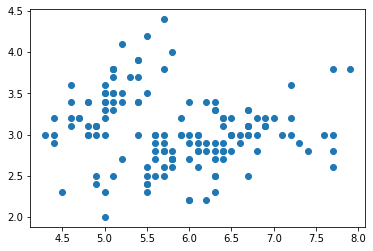

In [12]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

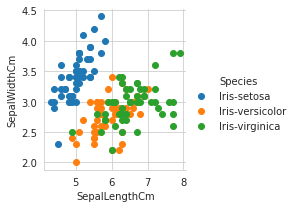

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
   .add_legend()

plt.show()

##### *By looking the Scatter plot we can say that all bluepoints(Iris-setosa) are separated perfectly as compare to orange(versicolor) or green(virginica) points for features(SepalLengthCm, SepalwidthCm)*

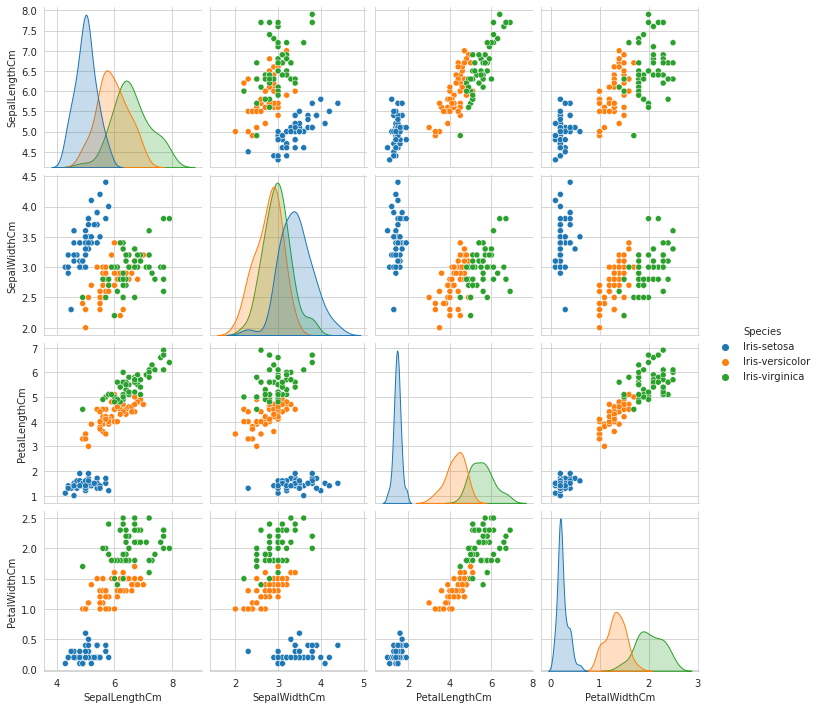

In [14]:
sns.pairplot(df.drop(['Id'], axis=1), hue = 'Species')
plt.show()

### *Exploring some new features*

In [15]:
df['Sepal_diff'] = df['SepalLengthCm'] - df['SepalWidthCm']
df['Petal_diff'] = df['PetalLengthCm'] - df['PetalWidthCm']
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1


In [16]:
df['Sepal_Petal_len_diff'] = df['SepalLengthCm'] - df['PetalLengthCm']
df['Sepal_Petal_width_diff'] = df['SepalWidthCm'] - df['PetalWidthCm']
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_len_diff,Sepal_Petal_width_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1


In [17]:
df['Sepal_Petal_len_width_diff'] = df['SepalLengthCm'] - df['PetalWidthCm']
df['Sepal_Petal_width_len_diff'] = df['SepalWidthCm'] - df['PetalLengthCm']
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_len_diff,Sepal_Petal_width_diff,Sepal_Petal_len_width_diff,Sepal_Petal_width_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


#### *Relationship between new feature based on class labels using pair plot*

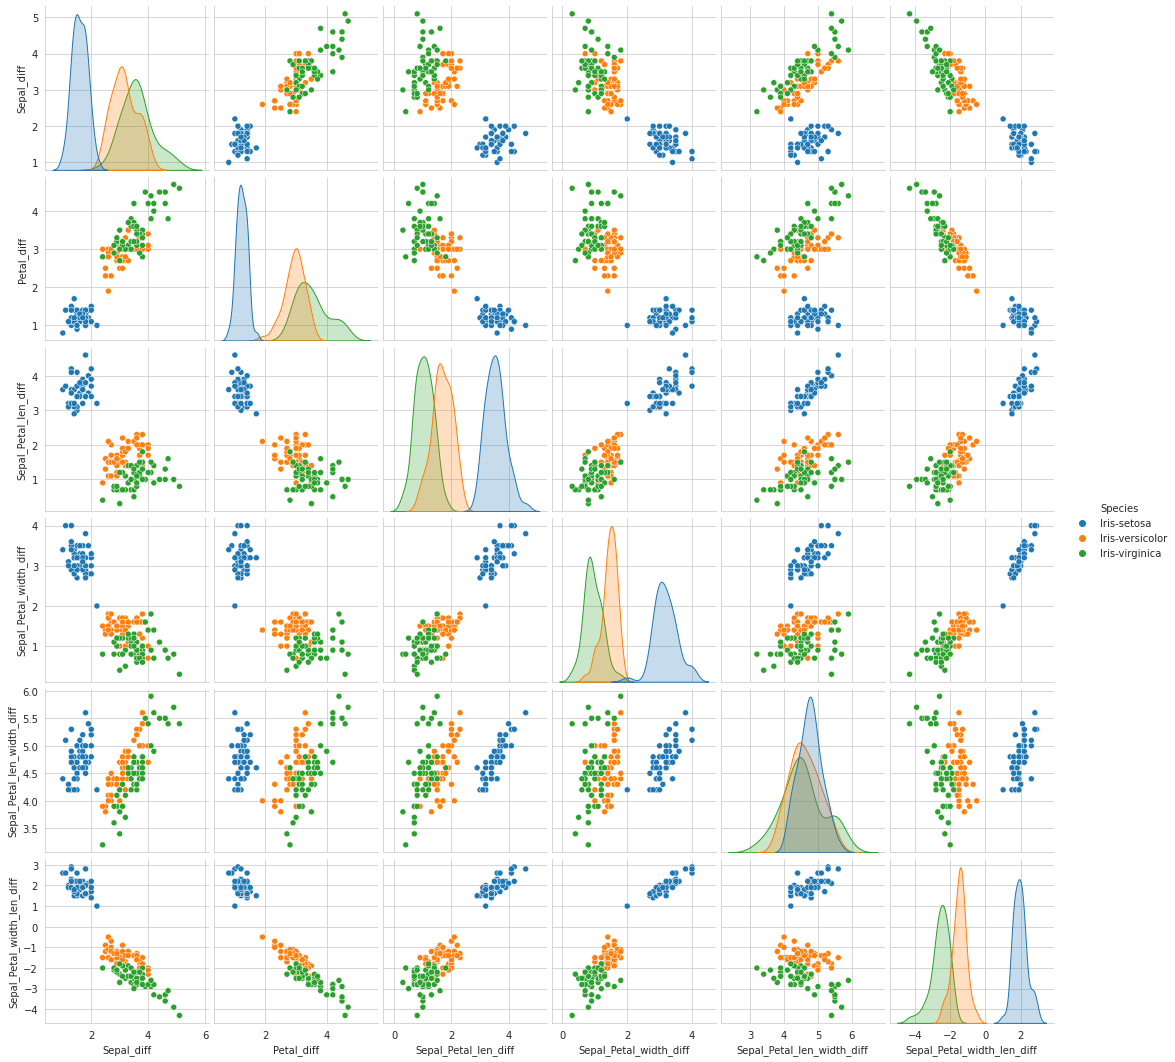

In [18]:
sns.pairplot(df[['Species', 'Sepal_diff', 'Petal_diff', 'Sepal_Petal_len_diff', 'Sepal_Petal_width_diff', 
                 'Sepal_Petal_len_width_diff', 'Sepal_Petal_width_len_diff']], hue = 'Species')

plt.show()

### *Building Classification Model*

In [19]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [20]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Sepal_Petal_width_len_diff', 'Sepal_Petal_width_diff']]
Y = df['Species']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [23]:
# Splitting data into validation train and validation test
X_v, X_tv, Y_v, Y_tv = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 42)

### *Traing the Decision Tree Classifier with training dataset*

In [24]:
clf = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2)
clf.fit(X_v, Y_v)

DecisionTreeClassifier()

### *Visualizing Decision Tree using graphviz library*

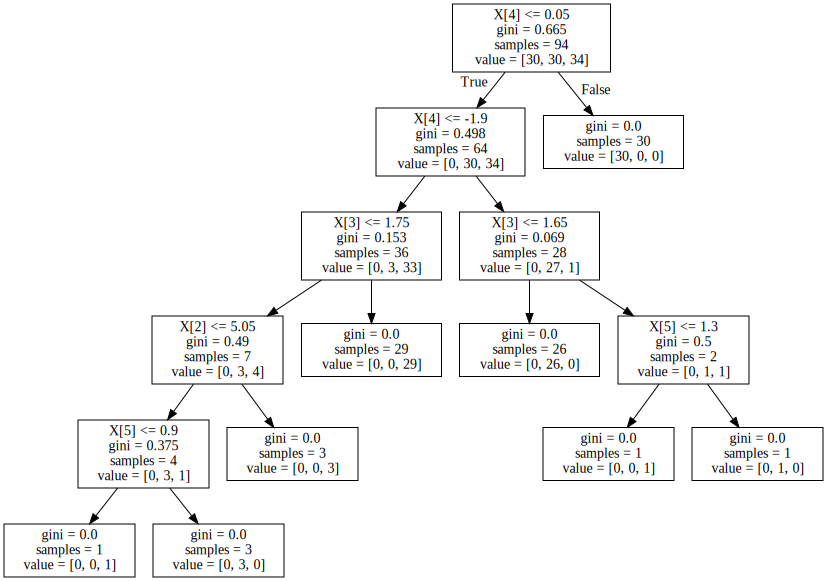

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

### *Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model*

In [27]:
print("Accuracy Score: ", cross_val_score(clf, X_v, Y_v, cv=3, scoring = 'accuracy').mean())

Accuracy Score:  0.9146505376344086


In [28]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [29]:
Y_hat = clf.predict(X_tv)

print("Accuracy Score for Validation Test Data is: ", accuracy_score(Y_tv, Y_hat))
multilabel_confusion_matrix(Y_tv, Y_hat)

Accuracy Score for Validation Test Data is:  0.9090909090909091


array([[[10,  0],
        [ 0,  1]],

       [[ 4,  0],
        [ 1,  6]],

       [[ 7,  1],
        [ 0,  3]]])

### *Checking our model performance on actual unseen test data*

In [30]:
YT_hat = clf.predict(X_test)
# YT_hat

print("Model Accuracy Score on Totally Unseen Test Data is: ", accuracy_score(Y_test, YT_hat)*100, '%')
multilabel_confusion_matrix(Y_test, YT_hat)

Model Accuracy Score on Totally Unseen Test Data is:  97.77777777777777 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 1, 12]],

       [[31,  1],
        [ 0, 13]]])

### *Training model on Actual train data*

In [31]:
clf_1 = DecisionTreeClassifier(criterion = 'gini', min_samples_split=2)
clf_1.fit(X_train, Y_train)

DecisionTreeClassifier()

### *Final Decision tree build for deploying in real world cases*

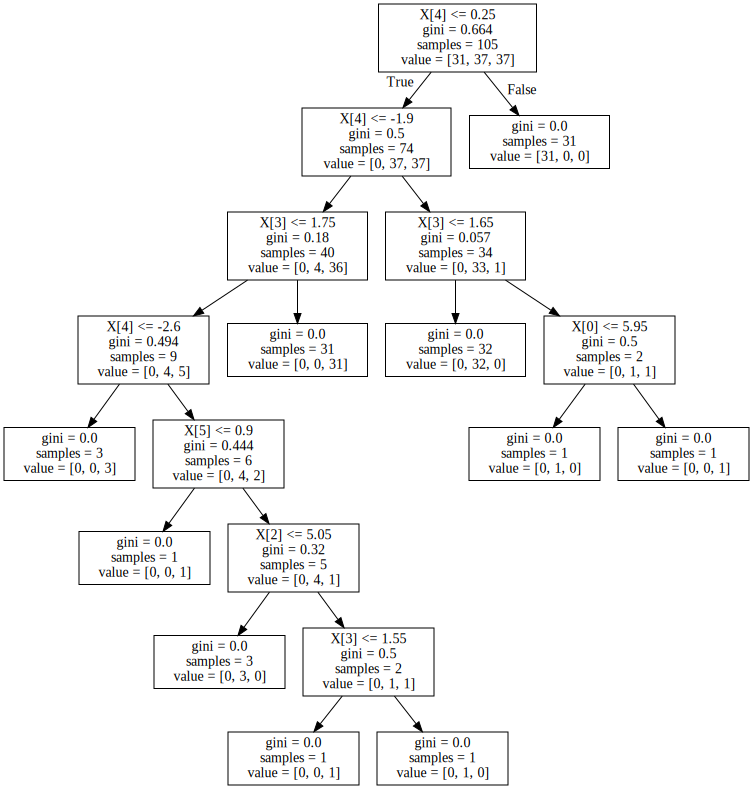

In [32]:
dot_data = tree.export_graphviz(clf_1, out_file=None)
graph = graphviz.Source(dot_data)
graph

### *Checking the performance of model on Actual Test data*

In [33]:
YT_hat_1 = clf_1.predict(X_test)
# YT_hat_1

print("Model Accuracy Score on Actual Test Data is: ", accuracy_score(Y_test, YT_hat_1)*100, '%')
multilabel_confusion_matrix(Y_test, YT_hat_1)

Model Accuracy Score on Actual Test Data is:  97.77777777777777 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 1, 12]],

       [[31,  1],
        [ 0, 13]]])

### *Testing for New points except from Dataset*

In [34]:
Test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3],
             [5.1,2.5,3.0,1.1,-0.5,1.4],
             [5.1,3.3,1.7,0.5,1.6,2.8],
             [6.0,2.7,5.1,1.6,-2.4,1.1],
             [6.0,2.2,5.0,1.5,-2.8,0.7]]

print(clf_1.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


## *Task 3 Completed.*

## *Thank You.*